In [ ]:
''' 
Pytorch is mostly work with PLY and OBJ. There is a beta version for GLB. 
I tried it so that you do not need to convery GLB to OBJ, but there are some bugs and the implementation is not stable

'''

In [1]:
from pygltflib import GLTF2, Scene
import trimesh

from pytorch3d.io import load_obj, load_ply
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    TexturesAtlas,
    PointsRenderer,
    PointsRasterizationSettings,
    PointsRasterizer
)



from pyrender import Mesh


from pytorch3d.io import IO
from pytorch3d.io.experimental_gltf_io import MeshGlbFormat


from pytorch3d.structures import Meshes

import sys
sys.path.append("../")
from rendererClass import RendererClass

import matplotlib.pyplot as plt
import json
import itertools
import torch
import numpy as np

In [7]:
param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:3"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))

In [8]:
path_bed = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.gltf"
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"
path_astronaut = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Astronaut/Astronaut.glb"
part_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/kitchen.glb"
path_banana = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Banana/banana.glb"
bottle = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/bottle/WaterBottle.glb"
path_apple = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Apple/apples.gltf"

In [24]:
io = IO()
io.register_meshes_format(MeshGlbFormat())

# If load with textures it gives error...
mesh_glb = io.load_mesh(path_astronaut, include_textures= True,device = device)

In [27]:
mesh_glb._verts_list

[tensor([[ 0.0095,  0.8253,  0.1077],
         [ 0.0270,  0.8464,  0.2492],
         [ 0.0000,  0.8415,  0.2438],
         ...,
         [-0.2532,  1.6374, -0.0279],
         [-0.2546,  1.6725, -0.0168],
         [-0.2635,  1.6321, -0.0274]], device='cuda:3')]

In [31]:
ex = mesh_glb._verts_list[0]

In [ ]:
vertices = torch.from_numpy(np.array(mesh_glb_trimesh.visual.vertex_colors[:,0:3],dtype='float32'))[None]


In [32]:
center = ex.mean(0)
verts = ex - center
scale = max(verts.abs().max(0)[0])
verts = verts / scale

In [34]:
mesh_glb._verts_list[0] = verts

In [22]:
# read it with trimesh as well
mesh_glb_trimesh = trimesh.load(path_astronaut, force = "mesh")

In [ ]:
features = torch.from_numpy(np.array(mesh_glb_trimesh.visual.vertex_colors[:,0:3],dtype='float32'))[None]


In [69]:
#color = torch.ones(1, mesh_glb._verts_list[0].shape[0], 3, device=device)
mesh_glb.textures = TexturesVertex(verts_features=features).to(device)

In [35]:
renderer = RendererClass(params)



In [40]:

example_pars = all_combs[0]
renderer_instance = renderer.get_renderer(2,0,180)

image = renderer_instance(mesh_glb)[0, ..., :3].cpu().numpy()

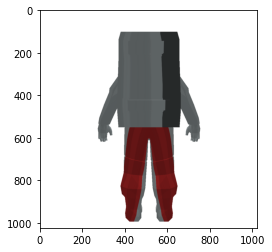

In [41]:
plt.imshow(image)
plt.show()